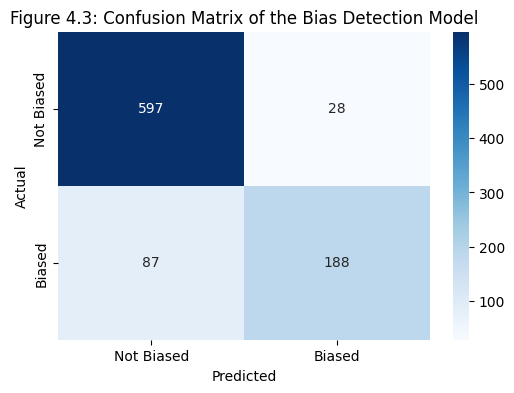

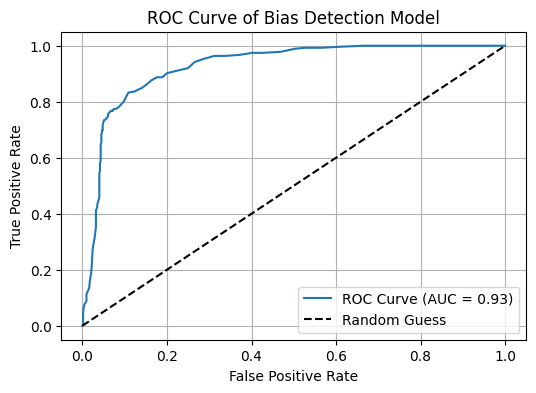

In [3]:
# Bias Detection Performance Evaluation - Figure 4.3
# 1. Imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.datasets import make_classification

# 2. Generate Sample Data (simulate bias_detector.py output)
# Assume binary classification: 1 = Biased, 0 = Not Biased
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2,
                           n_informative=5, weights=[0.7, 0.3], random_state=42)

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# 4. Train the Bias Detection Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 5. Make Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # For ROC

# 6. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Biased', 'Biased'], yticklabels=['Not Biased', 'Biased'])
plt.title('Figure 4.3: Confusion Matrix of the Bias Detection Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 7. ROC Curve (optional)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Bias Detection Model')
plt.legend()
plt.grid(True)
plt.show()
